In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df1.csv', index_col=0)
df2 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df2.csv', index_col=0)
df3 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df3.csv', index_col=0)

In [ ]:
df1

,PCODE,배럴지수,뜬공땅볼비율,장타율
3,50165,0.157248,2.253521,0.50700
11,50350,0.062500,1.897436,0.33600
14,50458,0.000000,1.112360,0.29300
15,50468,0.108434,1.625000,0.47700
16,50469,0.078261,1.629630,0.36700
...,...,...,...,...
428,79402,0.022989,1.334507,0.34375
430,79456,0.004754,0.790816,0.35425
433,79608,0.039496,1.822034,0.46725
435,99606,0.042017,1.074074,0.42100


### 1) Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

x = df1[['배럴지수', '뜬공땅볼비율']]
y = df1[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
x_train

,배럴지수,뜬공땅볼비율
404,0.054968,1.656863
427,0.099533,1.651852
79,0.082547,1.585106
348,0.045075,1.934959
334,0.041237,1.166667
...,...,...
335,0.082657,1.666667
78,0.042272,1.617647
421,0.022270,1.507937
329,0.073290,2.009009


In [ ]:
# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

#RMSE
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.05043418058988487

In [ ]:
# 결정계수 R^2
lr_model.score(x_train, y_train)

0.5378456939251157

### 2) SVM regression

In [ ]:
from sklearn.model_selection import train_test_split

x = df1[['배럴지수', '뜬공땅볼비율']]
y = df1[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr_model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.05361717489231732

In [ ]:
# 결정계수 R^2
svr_model.score(x_train, y_train)

0.2762509191722766

### 3) Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

x = df1[['배럴지수', '뜬공땅볼비율']]
y = df1[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# Random Forest, XGB는 독립변수 스케일링 필요 X

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#이건 그냥 모델 1개 생성해서 예측한거
model = RandomForestRegressor(max_depth=4, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.04878190951310589

In [ ]:
# 결정계수 R^2
model.score(x_train, y_train)

0.7307915218078557

In [ ]:
# 모델 파라미터 값들 하나씩 바꿔가면서 최적의 case 도출하는 과정
# 궁금하면 참고할 링크 https://injo.tistory.com/30

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
            'max_depth': [3, 4, 5, 6],
            "n_estimators"      : [100,150,200],
            'min_samples_leaf': [1, 2, 3],
            "min_samples_split" : [2, 3, 4],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid.best_score_

0.2442439348389991

In [ ]:
#가장 예측성능이 좋을때의 파라미터들
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#가장 성능이 좋은 파라미터를 선택하여 model train
rf_model = RandomForestRegressor(max_depth=3, n_estimators = 100, min_samples_leaf=1, min_samples_split = 2, bootstrap=True, random_state=0)

rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.05026235012143736

In [ ]:
# 결정계수 R^2
rf_model.score(x_train, y_train)

0.9233248788551616

In [ ]:
rf_model.score(x_test, y_test)

0.5187981470525005

### 4) XGBoost Regressor

In [ ]:
from sklearn.model_selection import train_test_split

x = df1[['배럴지수', '뜬공땅볼비율']]
y = df1[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# Random Forest, XGB는 독립변수 스케일링 필요 X

In [ ]:
import xgboost

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train,y_train)

[05:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.051310830628402374

In [ ]:
# 결정계수 R^2
xgb_model.score(x_train, y_train)

0.9937799043987292

In [ ]:
xgb_model.score(x_test, y_test)

0.2848633840491004

In [ ]:
from sklearn.model_selection import GridSearchCV

# 객체 생성, 일단은 트리 100개만 만듦
xgb_model = xgboost.XGBRegressor(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_test, y_test)])


print(gridcv.best_params_)

xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_model.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_test, y_test)])

[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-auc:0.543998
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.550307
[2]	validation_0-auc:0.553789
[3]	validation_0-auc:0.553789
[4]	validation_0-auc:0.552531
[5]	validation_0-auc:0.544758
[6]	validation_0-auc:0.546144
[7]	validation_0-auc:0.542542
[8]	validation_0-auc:0.544386
[9]	validation_0-auc:0.541052
[10]	validation_0-auc:0.539599
[11]	validation_0-auc:0.541099
[12]	validation_0-auc:0.541684
[13]	validation_0-auc:0.540795
[14]	validation_0-auc:0.540532
[15]	validation_0-auc:0.539798
[16]	validation_0-auc:0.538881
[17]	validation_0-auc:0.539755
[18]	validation_0-auc:0.538881
[19]	validation_0-auc:0.53835
[20]	validation_0-auc:0.538519
[21]	validation_0-auc:0.539124
[22]	validation_0-auc:0.540126
[23]	validation_0-auc:0.540353
[24]	validation_0-auc:0.540349
[25]	validation_0-auc:0.54002
[26]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_model.fit(x_train,y_train)

[05:04:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.0539866184556571

In [ ]:
# 결정계수 R^2
xgb_model.score(x_train, y_train)

0.9576885916340635

### 5) Deep Neural Network 회귀

In [ ]:
from sklearn.model_selection import train_test_split

x = df1[['배럴지수', '뜬공땅볼비율']]
y = df1[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
x_train

,배럴지수,뜬공땅볼비율
359,0.073016,1.566502
404,0.054968,1.656863
88,0.026941,1.456376
376,0.069102,2.547739
97,0.100446,1.784530
...,...,...
430,0.004754,0.790816
345,0.099099,2.447552
124,0.006579,1.236000
15,0.108434,1.625000


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[2,]), #input_shape는 독립변수 수로 바꿔주기
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam(0.001)

dnn_model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 50

hist = dnn_model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

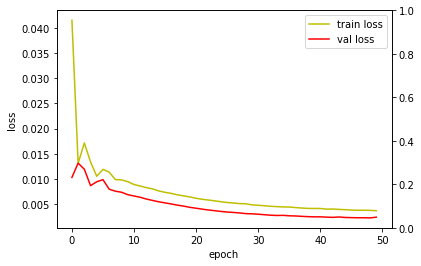

In [ ]:
# 그래프 코드
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
y_pred = dnn_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.05609795745009441

이친구는 위에서 똑같이 코드 적용하되,

Linear Regression, SVM Regreesion은 스케일링 해주고

RF, XGB, DNN는 스케일링 필요 X

In [ ]:
df2

,PCODE,배럴지수,뜬공땅볼비율,홈런,장타율
3,50165,0.157248,2.253521,23.00,0.50700
11,50350,0.062500,1.897436,2.00,0.33600
14,50458,0.000000,1.112360,1.00,0.29300
15,50468,0.108434,1.625000,6.00,0.47700
16,50469,0.078261,1.629630,8.00,0.36700
...,...,...,...,...,...
428,79402,0.022989,1.334507,5.25,0.34375
430,79456,0.004754,0.790816,0.75,0.35425
433,79608,0.039496,1.822034,10.25,0.46725
435,99606,0.042017,1.074074,4.00,0.42100


In [ ]:
#linear regression
x = df2[['배럴지수', '뜬공땅볼비율','홈런']]
y = df2[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

#RMSE
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.03593991706687917

In [ ]:
# 결정계수 R^2
lr_model.score(x_train, y_train)

0.6929898912911956

In [ ]:
#svm regression
from sklearn.model_selection import train_test_split

x = df2[['배럴지수', '뜬공땅볼비율','홈런']]
y = df2[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr_model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.060361320220630156

In [ ]:
# 결정계수 R^2
svr_model.score(x_train, y_train)

0.3122224190618216

In [ ]:
#random forest
from sklearn.model_selection import train_test_split

x = df2[['배럴지수', '뜬공땅볼비율','홈런']]
y = df2[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
            'max_depth': [3, 4, 5, 6],
            "n_estimators"      : [100,150,200],
            'min_samples_leaf': [1, 2, 3],
            "min_samples_split" : [2, 3, 4],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid.best_score_

0.6476041226887709

In [ ]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rf_model = RandomForestRegressor(max_depth=3, n_estimators = 100, min_samples_leaf=3, min_samples_split = 3, bootstrap=True, random_state=0)

rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.03847345282722389

In [ ]:
rf_model.score(x_train, y_train)

0.7934425653031061

In [ ]:
rf_model.score(x_test, y_test)

0.7048286146231031

In [ ]:
#xgboost regressor
from sklearn.model_selection import train_test_split

x = df2[['배럴지수', '뜬공땅볼비율','홈런']]
y = df2[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
import xgboost

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train,y_train)

[05:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.04164488558025033

In [ ]:
xgb_model.score(x_train, y_train)

0.9973753831692052

In [ ]:
xgb_model.score(x_test, y_test)

0.682433530964601

In [ ]:
from sklearn.model_selection import GridSearchCV

# 객체 생성, 일단은 트리 100개만 만듦
xgb_model = xgboost.XGBRegressor(n_estimators=100)

# 후보 파라미터 선정
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_test, y_test)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 학습
xgb_model.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_test, y_test)])

[05:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-auc:0.54827
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.570022
[2]	validation_0-auc:0.570371
[3]	validation_0-auc:0.56984
[4]	validation_0-auc:0.57089
[5]	validation_0-auc:0.571354
[6]	validation_0-auc:0.571038
[7]	validation_0-auc:0.571804
[8]	validation_0-auc:0.571094
[9]	validation_0-auc:0.571493
[10]	validation_0-auc:0.571493
[11]	validation_0-auc:0.572908
[12]	validation_0-auc:0.571421
[13]	validation_0-auc:0.57209
[14]	validation_0-auc:0.570685
[15]	validation_0-auc:0.571064
[16]	validation_0-auc:0.570779
[17]	validation_0-auc:0.570377
[18]	validation_0-auc:0.570092
[19]	validation_0-auc:0.568734
[20]	validation_0-auc:0.568481
[21]	validation_0-auc:0.568748
[22]	validation_0-auc:0.568862
[23]	validation_0-auc:0.568685
[24]	validation_0-auc:0.568584
[25]	validation_0-auc:0.567105
[26]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_model.fit(x_train,y_train)

[05:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.038987665284276975

In [ ]:
# 결정계수 R^2
xgb_model.score(x_train, y_train)

0.9249220571515421

In [ ]:
#5 deep neural network 회귀
from sklearn.model_selection import train_test_split

x = df2[['배럴지수', '뜬공땅볼비율','홈런']]
y = df2[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[3,]), #input_shape는 독립변수 수로 바꿔주기
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam(0.001)

dnn_model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 50

hist = dnn_model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

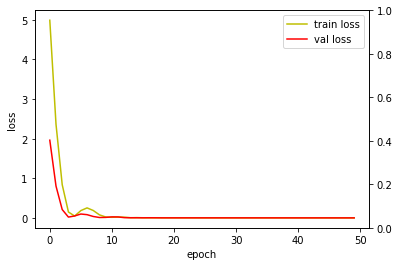

In [ ]:
# 그래프 코드
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
y_pred = dnn_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.06133275535204786

In [ ]:
df3

,PCODE,타율,홈런,인플레이타구비율,뜬공땅볼비율,배럴지수,장타율
3,50165,0.26050,23.00,0.307494,2.253521,0.157248,0.50700
11,50350,0.25400,2.00,0.297030,1.897436,0.062500,0.33600
14,50458,0.24950,1.00,0.290960,1.112360,0.000000,0.29300
15,50468,0.28000,6.00,0.369048,1.625000,0.108434,0.47700
16,50469,0.20900,8.00,0.259843,1.629630,0.078261,0.36700
...,...,...,...,...,...,...,...
428,79402,0.26225,5.25,0.307811,1.334507,0.022989,0.34375
430,79456,0.30200,0.75,0.337224,0.790816,0.004754,0.35425
433,79608,0.31700,10.25,0.344578,1.822034,0.039496,0.46725
435,99606,0.29500,4.00,0.387597,1.074074,0.042017,0.42100


In [ ]:
#linear regression
x = df3[['타율','홈런','인플레이타구비율','뜬공땅볼비율','배럴지수']]
y = df3[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

#RMSE
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.020625518129459484

In [ ]:
# 결정계수 R^2
lr_model.score(x_train, y_train)

0.9300232501130522

In [ ]:
#svm regression
from sklearn.model_selection import train_test_split

x = df3[['타율','홈런','인플레이타구비율','뜬공땅볼비율','배럴지수']]
y = df3[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# 칼럼별 분포를 정규화 시켜줄 필요성 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr_model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.08070166223291947

In [ ]:
# 결정계수 R^2
svr_model.score(x_train, y_train)

0.012616951571003732

In [ ]:
#random forest
from sklearn.model_selection import train_test_split

x = df3[['타율','홈런','인플레이타구비율','뜬공땅볼비율','배럴지수']]
y = df3[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
            'max_depth': [3, 4, 5, 6],
            "n_estimators"      : [100,150,200],
            'min_samples_leaf': [1, 2, 3],
            "min_samples_split" : [2, 3, 4],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid.best_score_

0.8162718043099298

In [ ]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rf_model = RandomForestRegressor(max_depth=5, n_estimators = 100, min_samples_leaf=2, min_samples_split = 3, bootstrap=True, random_state=0)

rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.021703204975646966

In [ ]:
rf_model.score(x_train, y_train)

0.9470535242974933

In [ ]:
#xgboost regressor
from sklearn.model_selection import train_test_split

x = df3[['타율','홈런','인플레이타구비율','뜬공땅볼비율','배럴지수']]
y = df3[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
import xgboost

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train,y_train)

[05:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.02248287410155061

In [ ]:
xgb_model.score(x_train, y_train)

0.9991518551273008

In [ ]:
xgb_model.score(x_test, y_test)

0.9087813631607229

In [ ]:
from sklearn.model_selection import GridSearchCV

# 객체 생성, 일단은 트리 100개만 만듦
xgb_model = xgboost.XGBRegressor(n_estimators=100)

# 후보 파라미터 선정
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_test, y_test)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 학습
xgb_model.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_test, y_test)])

[05:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-auc:0.569214
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.574399
[2]	validation_0-auc:0.57722
[3]	validation_0-auc:0.57847
[4]	validation_0-auc:0.579596
[5]	validation_0-auc:0.58113
[6]	validation_0-auc:0.58116
[7]	validation_0-auc:0.581901
[8]	validation_0-auc:0.581744
[9]	validation_0-auc:0.581707
[10]	validation_0-auc:0.581762
[11]	validation_0-auc:0.581793
[12]	validation_0-auc:0.581619
[13]	validation_0-auc:0.581619
[14]	validation_0-auc:0.581619
[15]	validation_0-auc:0.581569
[16]	validation_0-auc:0.581569
[17]	validation_0-auc:0.582093
[18]	validation_0-auc:0.582342
[19]	validation_0-auc:0.582642
[20]	validation_0-auc:0.582804
[21]	validation_0-auc:0.582744
[22]	validation_0-auc:0.582744
[23]	validation_0-auc:0.582744
[24]	validation_0-auc:0.582744
[25]	validation_0-auc:0.582866
[26]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_model.fit(x_train,y_train)

[05:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.021975356363200346

In [ ]:
# 결정계수 R^2
xgb_model.score(x_train, y_train)

0.9938035143274302

In [ ]:
#5 deep neural network 회귀
from sklearn.model_selection import train_test_split

x = df3[['타율','홈런','인플레이타구비율','뜬공땅볼비율','배럴지수']]
y = df3[['장타율']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[5,]), #input_shape는 독립변수 수로 바꿔주기
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam(0.001)

dnn_model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 50

hist = dnn_model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

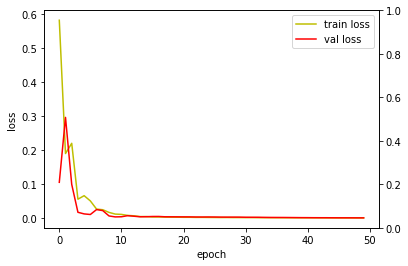

In [ ]:
# 그래프 코드
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
y_pred = dnn_model.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.032886636482029635